## Time Series Analysis

### 1.[Create datetime](#date)

### 2.[Plot and Decompose Timeline](#plttime)

### 3.[Dickey Fuller Test](#dftest)

### 4.[Plot Autocorrelations](#pltauto)

### 5.[Stationarize Data](#station)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import quandl
import statsmodels.api as sm
import warnings
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
%matplotlib inline

In [4]:
path = r"C:\Users\corri\Documents\New Career\Achievment 6\Rabies Project\Data"

In [5]:
#Import data
df_rabies = pd.read_csv(os.path.join(path, 'Prepared Data', 'Renamed_Total.csv'))

In [6]:
df_rabies.head()

,Unnamed: 0,Year,Semester,Country,Animal Category,Species,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
0,11206,2010,Jan-Jun 2010,Algeria,Domestic,Cats,53,12,6,0,6,0,7742
1,11207,2010,Jan-Jun 2010,Algeria,Domestic,Cattle,1049,93,47,17,29,0,7742
2,11208,2010,Jan-Jun 2010,Algeria,Domestic,Dogs,550,168,135,0,65,0,7742
3,11209,2010,Jan-Jun 2010,Algeria,Domestic,Equidae,93,28,15,0,13,0,7742
4,11210,2010,Jan-Jun 2010,Algeria,Domestic,Goats,748,8,3,0,5,0,7742


In [7]:
#Drop unwanted columns
df_time = df_rabies.drop(columns = ['Unnamed: 0', 'Semester', 'Animal Category', 'Species', 'Susceptible', 'Cases', 'Killed',
                                   'Slaughtered', 'Deaths', 'Vaccinated'])

In [8]:
df_time.head()

,Year,Country,Total Cases
0,2010,Algeria,7742
1,2010,Algeria,7742
2,2010,Algeria,7742
3,2010,Algeria,7742
4,2010,Algeria,7742


In [9]:
df_time.shape

(25952, 3)

In [10]:
#Remove duplicates
df_data = df_time.drop_duplicates()

In [11]:
df_data.head(10)

,Year,Country,Total Cases
0,2010,Algeria,7742
7,2010,Angola,226
9,2010,Benin,112
12,2010,Botswana,750
22,2010,Burundi,85
23,2010,Central African Republic,540
24,2010,Chad,56
26,2010,Ivory Coast,153
30,2010,Eswatini,160
38,2010,Ethiopia,2789


In [12]:
df_data.shape

(1048, 3)

In [13]:
df_total = df_data

In [14]:
#Sum the Total Cases by year
df_total ['Cases By Year'] = df_data.groupby('Year')['Total Cases'].transform('sum')

In [15]:
df_total.head(20)

,Year,Country,Total Cases,Cases By Year
0,2010,Algeria,7742,186325
7,2010,Angola,226,186325
9,2010,Benin,112,186325
12,2010,Botswana,750,186325
22,2010,Burundi,85,186325
23,2010,Central African Republic,540,186325
24,2010,Chad,56,186325
26,2010,Ivory Coast,153,186325
30,2010,Eswatini,160,186325
38,2010,Ethiopia,2789,186325


In [16]:
df_total.drop(columns = ['Total Cases', 'Country'], axis = 1, inplace = True)

In [17]:
df_total.head(20)

,Year,Cases By Year
0,2010,186325
7,2010,186325
9,2010,186325
12,2010,186325
22,2010,186325
23,2010,186325
24,2010,186325
26,2010,186325
30,2010,186325
38,2010,186325


In [18]:
df_total.shape

(1048, 2)

In [19]:
#Drop duplicates
df_total2 = df_total.drop_duplicates()

In [20]:
df_total2.head(20)

,Year,Cases By Year
0,2010,186325
2612,2011,187623
5180,2012,189069
7729,2013,190444
10350,2014,189348
12824,2015,186840
15457,2016,189179
17659,2017,189363
19968,2018,180814
22054,2019,177857


In [21]:
#Drop 2022 as it is incomplete
df_total2.drop(df_total2.loc[df_total2['Year'] == 2022].index, inplace = True)

In [22]:
df_total2.head(20)

,Year,Cases By Year
0,2010,186325
2612,2011,187623
5180,2012,189069
7729,2013,190444
10350,2014,189348
12824,2015,186840
15457,2016,189179
17659,2017,189363
19968,2018,180814
22054,2019,177857


In [23]:
df_total2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 25260
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           12 non-null     int64
 1   Cases By Year  12 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [24]:
#Create a new dataframe to experiment on without losing the original data
df_exp = df_total2

In [25]:
#Create a datetime
df_exp['datetime'] = pd.to_datetime(df_exp['Year'], format = '%Y')

In [26]:
df_exp.head()

,Year,Cases By Year,datetime
0,2010,186325,2010-01-01
2612,2011,187623,2011-01-01
5180,2012,189069,2012-01-01
7729,2013,190444,2013-01-01
10350,2014,189348,2014-01-01


In [27]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 25260
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           12 non-null     int64         
 1   Cases By Year  12 non-null     int64         
 2   datetime       12 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 384.0 bytes


## Create Datetime
<a id='date'></a>

In [28]:
# Set datetime column as index
df_exp = df_exp.set_index('datetime')
df_exp.drop(['Year'], axis = 1, inplace = True)

In [29]:
df_exp.head(10)

,Cases By Year
datetime,
2010-01-01,186325
2011-01-01,187623
2012-01-01,189069
2013-01-01,190444
2014-01-01,189348
2015-01-01,186840
2016-01-01,189179
2017-01-01,189363
2018-01-01,180814


## Plot and Decompose Timeline
<a id='plttime'></a>

In [30]:
# Fixed size for special charts
from pylab import rcParams
rcParams['figure.figsize'] = 18,7

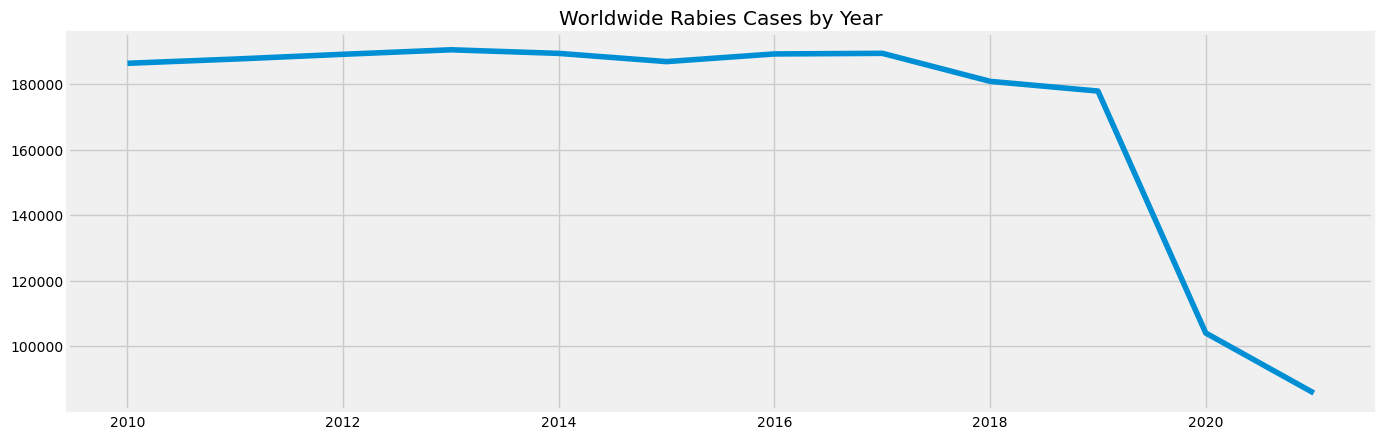

In [31]:
#Plot timeline
plt.figure(figsize = (15,5), dpi = 100)
plt.title('Worldwide Rabies Cases by Year')
plt.plot(df_exp)

In [32]:
#Define decomposition
decomposition = sm.tsa.seasonal_decompose(df_exp, model = 'additive')

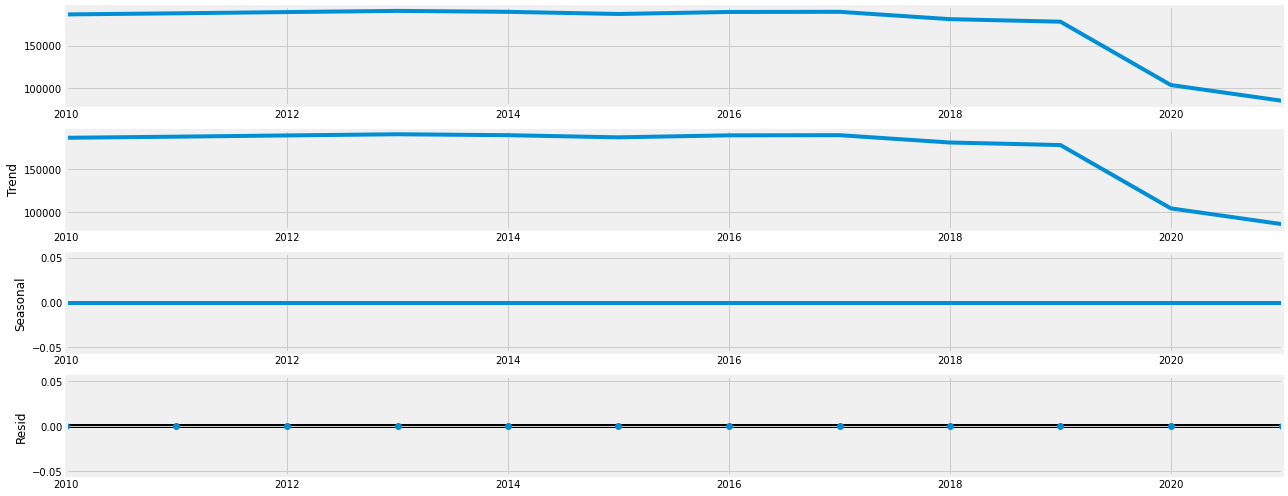

In [33]:
#Decompose the plot
decomposition.plot()
plt.show()

### There is no obvious Seasonal trend in the decomposed data but there is a clear decreasing trend in recent years.
### Null hypothesis = There is a unit root (data is not stationary)

## Create and Run Dickey Fuller Test
<a id='dftest'></a>

In [34]:
#Define Dickey Fuller test
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test [4].items():
        result ['Critical Value(%s)'%key] = value
    print(result)

In [35]:
# Run Dickey-Fuller test - All critical values are much smaller than test statistic.  The p-value is much too high so the null hypothesis cannot be rejected (there is a unit root so the data is not stationary).
dickey_fuller(df_exp)

Dickey-Fuller Stationarity Test:
Test Statistic                 1.668318
p-value                        0.998049
Number of Lags Used            3.000000
Number of Observations Used    8.000000
Critical Value(1%)            -4.665186
Critical Value(5%)            -3.367187
Critical Value(10%)           -2.802961
dtype: float64


## Plot Autocorrelations
<a id='pltauto'></a>

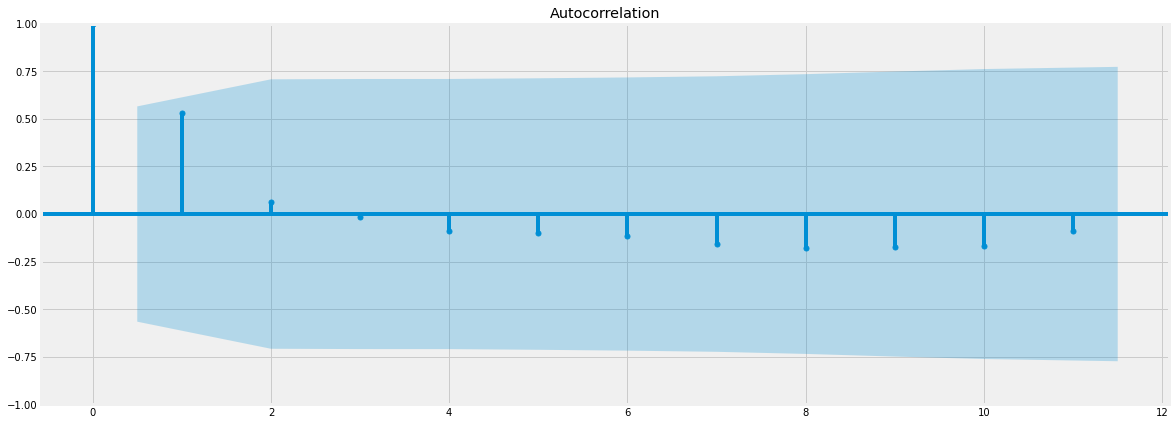

In [36]:
#Plot autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_exp)
plt.show()
#None of the vertical lines are outside of the standard deviation so no multiple correlated variables.

## Stationarize Data
<a id='station'></a>

In [37]:
#Stationarize the data (the decreasing trend in recent years is non-stationary)
df_diff = df_exp - df_exp.shift(1)
df_diff.dropna(inplace = True)

In [38]:
df_diff.head()

,Cases By Year
datetime,
2011-01-01,1298.0
2012-01-01,1446.0
2013-01-01,1375.0
2014-01-01,-1096.0
2015-01-01,-2508.0


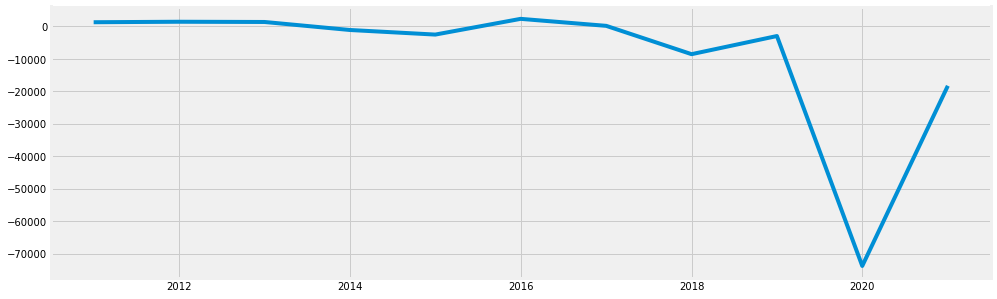

In [39]:
#Recheck curve
plt.figure(figsize = (15,5))
plt.plot(df_diff)

In [40]:
#Repeat dickey_fuller test - p-value is even higher so stationarization needs to be repeated
dickey_fuller(df_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                 3.378924
p-value                        1.000000
Number of Lags Used            1.000000
Number of Observations Used    9.000000
Critical Value(1%)            -4.473135
Critical Value(5%)            -3.289881
Critical Value(10%)           -2.772382
dtype: float64


In [41]:
#Stationarize
df_diff2 = df_diff - df_diff.shift(1)
df_diff2.dropna(inplace = True)

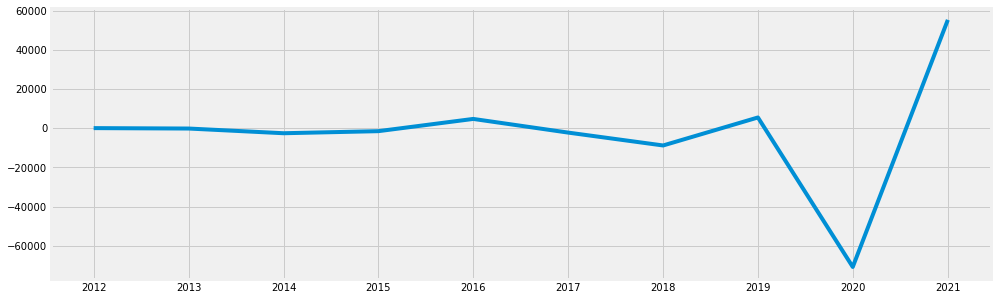

In [42]:
#Repeat curve
plt.figure(figsize = (15,5))
plt.plot(df_diff2)

In [43]:
#Repeat dickey_fuller test - p-value has improved but still isn't below the 0.05 cut-off
dickey_fuller(df_diff2)

Dickey-Fuller Stationarity Test:
Test Statistic                -2.739436
p-value                        0.067459
Number of Lags Used            3.000000
Number of Observations Used    6.000000
Critical Value(1%)            -5.354256
Critical Value(5%)            -3.646238
Critical Value(10%)           -2.901198
dtype: float64


In [44]:
#Stationarize
df_diff3 = df_diff2 - df_diff2.shift(1)
df_diff3.dropna(inplace = True)

In [45]:
df_diff3.head()

,Cases By Year
datetime,
2013-01-01,-219.0
2014-01-01,-2400.0
2015-01-01,1059.0
2016-01-01,6259.0
2017-01-01,-7002.0


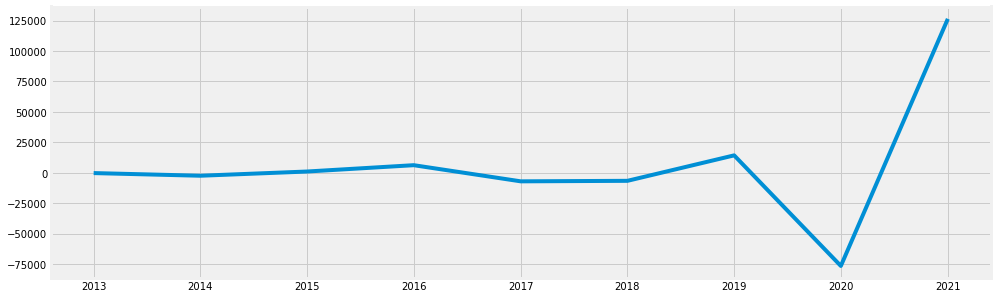

In [46]:
#Repeat curve
plt.figure(figsize = (15,5))
plt.plot(df_diff3)

In [47]:
#Repeat dickey_fuller - 5% critical value is larger than the test statistic
dickey_fuller(df_diff3)

Dickey-Fuller Stationarity Test:
Test Statistic                -1.045941e+01
p-value                        1.371439e-18
Number of Lags Used            0.000000e+00
Number of Observations Used    8.000000e+00
Critical Value(1%)            -4.665186e+00
Critical Value(5%)            -3.367187e+00
Critical Value(10%)           -2.802961e+00
dtype: float64


In [48]:
#Stationarize
df_diff4 = df_diff3 - df_diff3.shift(1)
df_diff4.dropna(inplace = True)

In [49]:
#Repeat dickey_fuller
dickey_fuller(df_diff4)

Dickey-Fuller Stationarity Test:
Test Statistic                -3.790039
p-value                        0.003011
Number of Lags Used            1.000000
Number of Observations Used    6.000000
Critical Value(1%)            -5.354256
Critical Value(5%)            -3.646238
Critical Value(10%)           -2.901198
dtype: float64


In [50]:
#Stationarize
df_diff5 = df_diff4 - df_diff4.shift(1)
df_diff5.dropna(inplace = True)

In [51]:
#Repeat dickey_fuller
dickey_fuller(df_diff5)

Dickey-Fuller Stationarity Test:
Test Statistic                -5.580345
p-value                        0.000001
Number of Lags Used            1.000000
Number of Observations Used    5.000000
Critical Value(1%)            -6.045114
Critical Value(5%)            -3.929280
Critical Value(10%)           -2.986810
dtype: float64


In [52]:
#Stationarize
df_diff6 = df_diff5 - df_diff5.shift(1)
df_diff6.dropna(inplace = True)

In [53]:
#Repeat dickey_fuller
dickey_fuller(df_diff6)

Dickey-Fuller Stationarity Test:
Test Statistic                -4.635843
p-value                        0.000111
Number of Lags Used            1.000000
Number of Observations Used    4.000000
Critical Value(1%)            -7.355441
Critical Value(5%)            -4.474365
Critical Value(10%)           -3.126933
dtype: float64


In [54]:
#Stationarize
df_diff7 = df_diff6 - df_diff6.shift(1)
df_diff7.dropna(inplace = True)

In [55]:
#Repeat dickey_fuller - p-value is less than 0.05 and Critical Value of 5% is less than the test statistic
dickey_fuller(df_diff7)

Dickey-Fuller Stationarity Test:
Test Statistic                -2.912648
p-value                        0.043897
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value(1%)            -7.355441
Critical Value(5%)            -4.474365
Critical Value(10%)           -3.126933
dtype: float64


In [56]:
df_diff7.head()

,Cases By Year
datetime,
2017-01-01,-16303.0
2018-01-01,52348.0
2019-01-01,-25352.0
2020-01-01,-138969.0
2021-01-01,537538.0


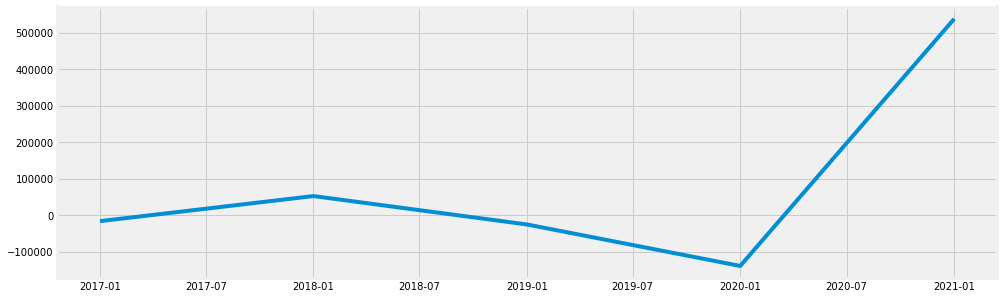

In [57]:
#Check curve
plt.figure(figsize = (15,5))
plt.plot(df_diff7)

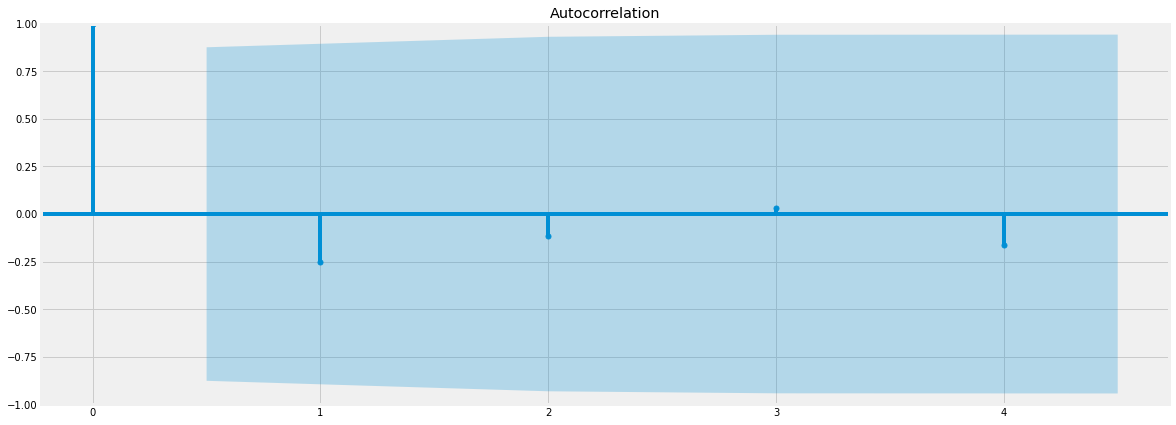

In [58]:
#Recheck autocorrelations
plot_acf(df_diff7)
plt.show()

### After 7 standardizations the data is finally stationary (the p-value is less than 0.05 and the 5% Critical Value is smaller than the Test Statistic) and can be used for forecasting.  The data is clearly statistical as you cannot have a negative number of cases.

### The decreasing trend in 2020 and 2021 could have multiple causes.  The World Health Organization does have an initiative to eradicate rabies in humans (which involves education and prevention) and has been working on this initiative for many years.  The human global pandemic (Covid 19) has likely also affected both testing and reporting as countries were focused on concerns other than rabies.  It will be interesting to see what the actual case numbers are over the next couple of years.